In [51]:
#importing libraries

import numpy as np
import pyreadstat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import scatterplot as scatter

from scipy.sparse import csr_matrix

from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA

from sklearn.semi_supervised import LabelSpreading
from sklearn.semi_supervised import LabelPropagation

from sklearn import svm

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
#from sklearn.model_selection import cross_val_score
#import sklearn.metrics.scorer as scorer


#reading data from file

#df,meta=pyreadstat.read_sav("C:/Users/APPLE/Desktop/Folders/sana thesis/SHAHNAZ-meysam-tekvando.sav")
df=pd.read_excel("C:/Users/APPLE/Desktop/Folders/sana thesis/SHAHNAZ-meysam-tekvandolabelmodified.xls")

#preprocessing operations such as converting Nan values to zero,
#converting fields without value to zero,
#removing ID,fisrtname, and familyname columns from dataset
#data=np.nan_to_num(data,0)

features_name=df.columns
data=np.array(df)
df=pd.DataFrame(data=data,columns=features_name)
df=df.drop(['firstname','familyname','year'],axis=1)

# keep only women samples
df1=df
for l in range(2559):
    if (df1.iloc[l,0]==1.0):
        df=df.drop([l])    

true_labels=df.iloc[:,-1]
df=df.drop(['label','gender'],axis=1)
features_name=df.columns
        
true_labels=true_labels.fillna(0)
for i in range(len(true_labels)):
    if (true_labels.iloc[i]==0):
        true_labels.iloc[i]=-1


In [52]:
df=df.drop(['Concani','burus','wingetAP','WingtePP','ricaveri','oneMayl','pareshTool','ghodratPanjeh','barfix','jaheshJanebi',
            'FlexibleShoulder','RTshenidari','tawanBiHavazi','biHAVA1609','Do1600','yekMayl',
            'metr540','taadol'],axis=1)
features_name=df.columns

In [53]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor

data=np.array(df)
data=data.astype('float')
data[data==0.0]=np.nan
df=pd.DataFrame(data=data,columns=features_name)

strategy=('mean','median')
simpleimputer=SimpleImputer(missing_values=np.nan, strategy=strategy[1])
data1=simpleimputer.fit_transform(df)
#df1=pd.DataFrame(data=data1,columns=features_name)
#simpleimputer=SimpleImputer(missing_values=0.0, strategy=strategy[0])
#data1=simpleimputer.fit_transform(df1)


knnimputer=KNNImputer(missing_values=np.nan)
data2=knnimputer.fit_transform(df)
#df2=pd.DataFrame(data=data2,columns=features_name)
#knnimputer=KNNImputer(missing_values=0.0)
#data2=knnimputer.fit_transform(df2)

estimators=[BayesianRidge(),
            DecisionTreeRegressor(max_features='sqrt',random_state=0),
            ExtraTreesRegressor(n_estimators=10, random_state=0),
            KNeighborsRegressor(n_neighbors=15)
           ]

iterativeimputer=IterativeImputer(missing_values=np.nan, random_state=0, estimator=estimators[1], n_nearest_features=5)
data3=iterativeimputer.fit_transform(df)
#df3=pd.DataFrame(data=data3,columns=features_name)
#iterativeimputer=IterativeImputer(missing_values=0.0, random_state=0, estimator=estimators[0], n_nearest_features=5)
#data3=iterativeimputer.fit_transform(df3)



C:\Users\APPLE\AppData\Roaming\Python\Python37\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [54]:
#performing standardScaler as preprocessing

scaler=StandardScaler(with_mean=False)
data_scaled=scaler.fit_transform(data2)
df=pd.DataFrame(data=data_scaled,columns=features_name)


In [55]:
#keep 70% of labeled data for test
true_labels=true_labels.astype(float)
true_labels.reset_index(inplace=True, drop=True)

df['label']=true_labels
df3=df
df4=df

# making df3 as a labeled set
for l in range(len(df)):
    if(df.iloc[l,-1]==-1):
        df3=df3.drop([l])
        
df3_labels=df3.iloc[:,-1]
df5=df3
#df3=df3.drop(['label'],axis=1)
X_train_labeled,X_test=train_test_split(df3,test_size=0.60,random_state=42)

#making df4 as an unlabeled set
for l in range(len(df)):
    for i in range(len(df5)):
        if (df.iloc[l,:].equals(df5.iloc[i,:])):
            df4=df4.drop([l])
            break

X_train=df4
X_train=X_train.append(X_train_labeled)

Y_train_labeled=X_train_labeled.iloc[:,-1]
X_train_labeled=X_train_labeled.drop(['label'],axis=1)
Y_train_labeled=Y_train_labeled.to_frame()
Y_train_labeled=Y_train_labeled.astype(float)
Y_train_labeled=Y_train_labeled.reset_index(drop=True)
X_train_labeled=X_train_labeled.astype(float)
X_train_labeled=X_train_labeled.reset_index( drop=True)

Y_train=X_train.iloc[:,-1]
Y_test=X_test.iloc[:,-1]
X_train=X_train.drop(['label'],axis=1)
X_test=X_test.drop(['label'],axis=1)
Y_train=Y_train.astype(float)
Y_train=Y_train.reset_index(drop=True)
Y_test=Y_test.astype(float)
Y_test=Y_test.reset_index( drop=True)
X_train=X_train.astype(float)
X_test=X_test.astype(float)
X_train=X_train.reset_index( drop=True)
X_test=X_test.reset_index( drop=True)
Y_train=Y_train.to_frame()
Y_test=Y_test.to_frame()

In [40]:
#preprocess for class 1

Y_train=Y_train.replace(-1,-2)
true_labels=true_labels.replace(-1,-2)

Y_train=Y_train.replace(2,-1)
Y_train=Y_train.replace(3,-1)

true_labels=true_labels.replace(-1,-2)
true_labels=true_labels.replace(2,-1)
true_labels=true_labels.replace(3,-1)

Y_test=Y_test.replace(-1,-2)

Y_test=Y_test.replace(2,-1)
Y_test=Y_test.replace(3,-1)

Y_train_labeled=Y_train_labeled.replace(2,-1)
Y_train_labeled=Y_train_labeled.replace(3,-1)

In [48]:
#preprocess for class 2 

Y_train=Y_train.replace(-1,-2)

Y_train=Y_train.replace(1,-1)
Y_train=Y_train.replace(3,-1)
Y_train=Y_train.replace(2,1)

true_labels=true_labels.replace(-1,-2)

true_labels=true_labels.replace(1,-1)
true_labels=true_labels.replace(3,-1)
true_labels=true_labels.replace(2,1)

Y_test=Y_test.replace(-1,-2)

Y_test=Y_test.replace(1,-1)
Y_test=Y_test.replace(3,-1)
Y_test=Y_test.replace(2,1)


Y_train_labeled=Y_train_labeled.replace(1,-1)
Y_train_labeled=Y_train_labeled.replace(3,-1)
Y_train_labeled=Y_train_labeled.replace(2,1)

In [56]:
#preprocess for class 3 

Y_train=Y_train.replace(-1,-2)

Y_train=Y_train.replace(1,-1)
Y_train=Y_train.replace(2,-1)
Y_train=Y_train.replace(3,1)

true_labels=true_labels.replace(-1,-2)

true_labels=true_labels.replace(1,-1)
true_labels=true_labels.replace(2,-1)
true_labels=true_labels.replace(3,1)

Y_test=Y_test.replace(-1,-2)

Y_test=Y_test.replace(1,-1)
Y_test=Y_test.replace(2,-1)
Y_test=Y_test.replace(3,1)


Y_train_labeled=Y_train_labeled.replace(1,-1)
Y_train_labeled=Y_train_labeled.replace(2,-1)
Y_train_labeled=Y_train_labeled.replace(3,1)

In [57]:
# SemiBoost
import sys
sys.path.append('C:/Users/APPLE/Desktop/Folders/sana thesis/semi-supervised/semi_boost-master - Copy - Copy/semi_boost-master/src')
import SemiBoost
import utils
from sklearn.datasets import make_classification, make_gaussian_quantiles, make_blobs, make_moons, make_circles

from sklearn.decomposition import KernelPCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import DictionaryLearning

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from scipy.spatial.distance import pdist,squareform
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions
import importlib

ROC_semiboost = list()
ROC_clf = list()

X_train=np.array(X_train)
Y_train=np.array(Y_train)
Y_train=np.squeeze(Y_train)

X_test=np.array(X_test)
Y_test=np.array(Y_test)
Y2_test=Y_test
Y_test=np.squeeze(Y_test)

X_train_labeled=np.array(X_train_labeled)
Y_train_labeled=np.array(Y_train_labeled)
Y_train_labeled=np.squeeze(Y_train_labeled)


#feature extraction algorithms

svd = TruncatedSVD(n_components=2, algorithm='randomized')
data_extracted=svd.fit_transform(X_train)
data_test_extracted=svd.fit_transform(X_test)
data_train_labeled_extracted=svd.fit_transform(X_train_labeled)

#nmf=NMF(n_components=2, init='random', random_state=0)
#data_extracted=nmf.fit_transform(X_train)
#data_test_extracted=nmf.fit_transform(X_test)
#data_train_labeled_extracted=nmf.fit_transform(X_train_labeled)

#fastICA=FastICA(n_components=2, random_state=0)
#data_extracted=fastICA.fit_transform(X_train)
#data_test_extracted=fastICA.fit_transform(X_test)
#data_train_labeled_extracted=fastICA.fit_transform(X_train_labeled)

#kpca=KernelPCA(n_components=2,kernel='poly')
#data_extracted=kpca.fit_transform(X_train)
#data_test_extracted=kpca.fit_transform(X_test)
#data_train_labeled_extracted=kpca.fit_transform(X_train_labeled)

#lda=LatentDirichletAllocation(n_components=2, random_state=0)
#data_extracted=lda.fit_transform(X_train)
#data_test_extracted=lda.fit_transform(X_test)
#data_train_labeled_extracted=lda.fit_transform(X_train_labeled)

#pca=PCA(n_components=2)
#data_extracted=pca.fit_transform(X_train)
#data_test_extracted=pca.fit_transform(X_test)
#data_train_labeled_extracted=pca.fit_transform(X_train_labeled)

#fa=FactorAnalysis(n_components=2, random_state=0)
#data_extracted=fa.fit_transform(X_train)
#data_test_extracted=fa.fit_transform(X_test)
#data_train_labeled_extracted=fa.fit_transform(X_train_labeled)

#dl=DictionaryLearning(n_components=2, random_state=0, fit_algorithm='cd',transform_algorithm='lasso_cd')
#data_extracted=fa.fit_transform(X_train)
#data_test_extracted=fa.fit_transform(X_test)
#data_train_labeled_extracted=fa.fit_transform(X_train_labeled)

''' SEMIBOOST SKLEARN STYLE '''

model=SemiBoost.SemiBoostClassifier(base_model =SVC(probability = True))
model.fit(data_extracted,Y_train,n_neighbors = 3, n_jobs = 10, max_models = 15, similarity_kernel='rbf', verbose = False)
y_predicted=model.predict(data_test_extracted)
ROC_semiboost.append(roc_auc_score(Y_test,model.predict(data_test_extracted)))
cm=confusion_matrix(Y2_test, y_predicted)

print("classification report of SemiBoost")
print(classification_report(Y2_test, y_predicted))
print("confusion_matrix")
print(cm)

''' BASE CLASSIFIER '''

clf= SVC(probability = True)
clf.fit(data_train_labeled_extracted,Y_train_labeled)
y_predicted=clf.predict(data_test_extracted)
ROC_clf.append(roc_auc_score(Y_test,model.predict(data_test_extracted)))


#print("the mean of ROC_semiboost-ROC_BaseClassifier "+str(np.mean(np.array(ROC_semiboost)-np.array(ROC_clf))))
#print("the standard deviation of ROC_semiboost-ROC_BaseClassifier "+ str(np.std(np.array(ROC_semiboost)-np.array(ROC_clf))))

cm=confusion_matrix(Y2_test, y_predicted)

print("classification report of Base Classifier")
print(classification_report(Y2_test, y_predicted))
print("confusion_matrix")
print(cm)



classification report of SemiBoost
              precision    recall  f1-score   support

        -1.0       0.80      1.00      0.89        84
         1.0       0.00      0.00      0.00        21

    accuracy                           0.80       105
   macro avg       0.40      0.50      0.44       105
weighted avg       0.64      0.80      0.71       105

confusion_matrix
[[84  0]
 [21  0]]
classification report of Base Classifier
              precision    recall  f1-score   support

        -1.0       0.80      1.00      0.89        84
         1.0       0.00      0.00      0.00        21

    accuracy                           0.80       105
   macro avg       0.40      0.50      0.44       105
weighted avg       0.64      0.80      0.71       105

confusion_matrix
[[84  0]
 [21  0]]


C:\Users\APPLE\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\APPLE\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\APPLE\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  


ValueError: Filled contours require at least 2 levels.

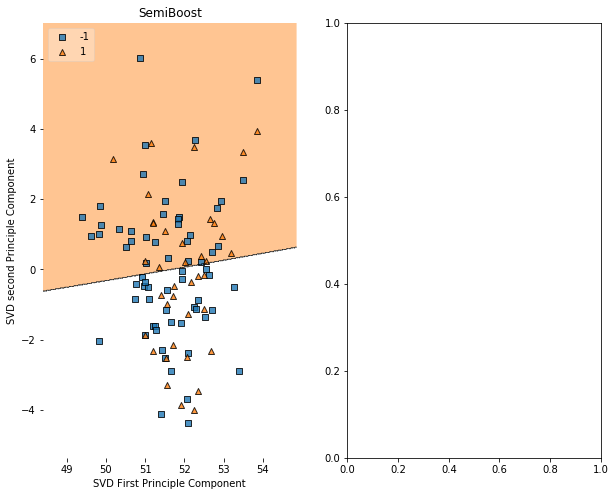

In [42]:
''' Plot Test data'''
gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(10,8))

y=Y2_test
y=y.astype(np.integer)
y=np.squeeze(y)

ax = plt.subplot(gs[0, 0])
fig = plot_decision_regions(X=data_test_extracted, y=y, clf=model, legend=2)
plt.title('SemiBoost')
fig=plt.xlabel("SVD First Principle Component")
fig=plt.ylabel("SVD second Principle Component")


''' Plot '''
ax = plt.subplot(gs[0, 1])
fig = plot_decision_regions(X=data_test_extracted, y=y, clf=clf, legend=2)
plt.title('BaseModel')
fig=plt.xlabel("SVD First Principle Component")
fig=plt.ylabel("SVD second Principle Component")

plt.show()

In [58]:
# SemiBoost for whole data
import sys
sys.path.append('C:/Users/APPLE/Desktop/Folders/sana thesis/semi-supervised/semi_boost-master - Copy - Copy/semi_boost-master/src')
import SemiBoost
import utils
from sklearn.datasets import make_classification, make_gaussian_quantiles, make_blobs, make_moons, make_circles

from sklearn.decomposition import KernelPCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import DictionaryLearning

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from scipy.spatial.distance import pdist,squareform
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions
import importlib

ROC_semiboost = list()
ROC_clf = list()


whole_data=df.drop(['label'],axis=1)
whole_data=np.array(whole_data)
true_labels=np.array(true_labels)
true_labels=np.squeeze(true_labels)


#feature extraction algorithms

svd = TruncatedSVD(n_components=2, algorithm='randomized')
data_extracted=svd.fit_transform(X_train)
data_test_extracted=svd.fit_transform(X_test)
data_train_labeled_extracted=svd.fit_transform(X_train_labeled)

#nmf=NMF(n_components=2, init='random', random_state=0)
#whole_data_extracted=nmf.fit_transform(whole_data)


#fastICA=FastICA(n_components=2, random_state=0)
#data_extracted=fastICA.fit_transform(X_train)
#data_test_extracted=fastICA.fit_transform(X_test)
#data_train_labeled_extracted=fastICA.fit_transform(X_train_labeled)

#kpca=KernelPCA(n_components=2,kernel='poly')
#data_extracted=kpca.fit_transform(X_train)
#data_test_extracted=kpca.fit_transform(X_test)
#data_train_labeled_extracted=kpca.fit_transform(X_train_labeled)

#lda=LatentDirichletAllocation(n_components=2, random_state=0)
#data_extracted=lda.fit_transform(X_train)
#data_test_extracted=lda.fit_transform(X_test)
#data_train_labeled_extracted=lda.fit_transform(X_train_labeled)

#pca=PCA(n_components=2)
#data_extracted=pca.fit_transform(X_train)
#data_test_extracted=pca.fit_transform(X_test)
#data_train_labeled_extracted=pca.fit_transform(X_train_labeled)

#fa=FactorAnalysis(n_components=2, random_state=0)
#data_extracted=fa.fit_transform(X_train)
#data_test_extracted=fa.fit_transform(X_test)
#data_train_labeled_extracted=fa.fit_transform(X_train_labeled)

#dl=DictionaryLearning(n_components=2, random_state=0, fit_algorithm='cd',transform_algorithm='lasso_cd')
#data_extracted=fa.fit_transform(X_train)
#data_test_extracted=fa.fit_transform(X_test)
#data_train_labeled_extracted=fa.fit_transform(X_train_labeled)

''' SEMIBOOST SKLEARN STYLE '''

model=SemiBoost.SemiBoostClassifier(base_model =SVC(probability = True))
model.fit(whole_data_extracted,true_labels,n_neighbors = 3, n_jobs = 10, max_models = 15, similarity_kernel='rbf', verbose = False)
y_predicted=model.predict(whole_data_extracted)


#print("the mean of ROC_semiboost-ROC_BaseClassifier "+str(np.mean(np.array(ROC_semiboost)-np.array(ROC_clf))))
#print("the standard deviation of ROC_semiboost-ROC_BaseClassifier "+ str(np.std(np.array(ROC_semiboost)-np.array(ROC_clf))))




C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Raw_whole_data')

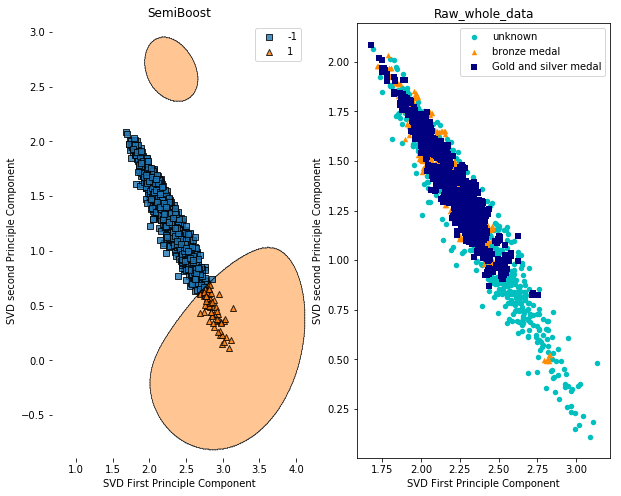

In [60]:
''' Plot whole data'''
gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(10,8))

y=y_predicted
y=y.astype(np.integer)
y=np.squeeze(y)

y_true=true_labels
y_true=y_true.astype(np.integer)
y_true=np.squeeze(y_true)

ax = plt.subplot(gs[0, 0])
fig = plot_decision_regions(X=whole_data_extracted, y=y, clf=model, legend=2)
plt.title('SemiBoost')
fig=plt.xlabel("SVD First Principle Component")
fig=plt.ylabel("SVD second Principle Component")
plt.legend(scatterpoints=1, shadow=False, loc='upper right')



ax = plt.subplot(gs[0, 1])
fig=plt.scatter(whole_data_extracted[true_labels==-2, 0],whole_data_extracted[true_labels==-2, 1],color='c',marker='o', lw=0, label="unknown", s=30)
fig=plt.scatter(whole_data_extracted[true_labels==1, 0],whole_data_extracted[true_labels==1, 1],color='darkorange',marker='^', lw=0, label="bronze medal", s=30)
fig=plt.scatter(whole_data_extracted[true_labels==-1, 0],whole_data_extracted[true_labels==-1, 1],color='navy',marker='s', lw=0, label="Gold and silver medal", s=30)
fig=plt.xlabel("SVD First Principle Component")
fig=plt.ylabel("SVD second Principle Component")
plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title('Raw_whole_data')